In [21]:
# import torch
# from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler

# model_id = "stabilityai/stable-diffusion-2-1"

# # Use the DPMSolverMultistepScheduler (DPM-Solver++) scheduler here instead
# pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
# pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
# pipe = pipe.to("cuda")

# prompt = "a photo of an astronaut riding a horse on mars"
# image = pipe(prompt).images[0]
    
# image.save("astronaut_rides_horse.png")

text_encoder\model.safetensors not found


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/37 [00:00<?, ?it/s]

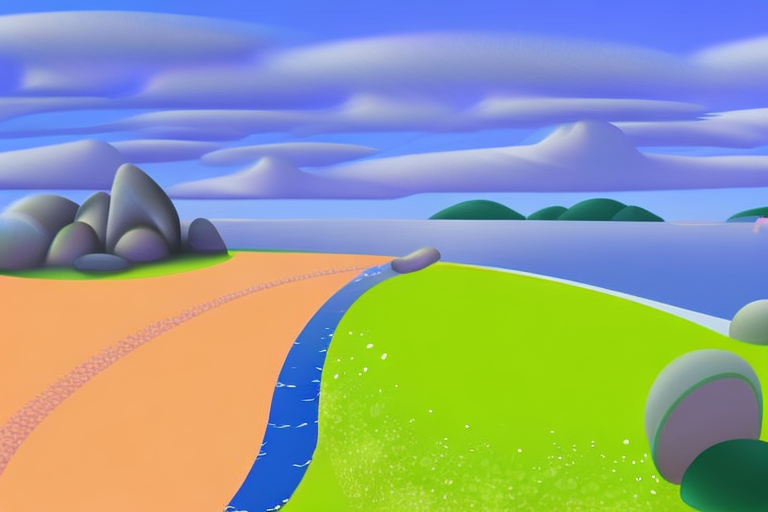

In [22]:
import requests
import torch
from PIL import Image
from io import BytesIO

from diffusers import StableDiffusionImg2ImgPipeline
torch.cuda.empty_cache()
# device = "cuda"
model_id_or_path = "stabilityai/stable-diffusion-2-1"
pipe = StableDiffusionImg2ImgPipeline.from_pretrained(model_id_or_path, torch_dtype=torch.float32).to("cuda")
# pipe = pipe.to(device)

url = "https://raw.githubusercontent.com/CompVis/stable-diffusion/main/assets/stable-samples/img2img/sketch-mountains-input.jpg"

response = requests.get(url)
init_image = Image.open(BytesIO(response.content)).convert("RGB")
init_image = init_image.resize((768, 512))

prompt = "A fantasy landscape, realistic"

image = pipe(prompt=prompt, image=init_image, strength=0.75, guidance_scale=7.5).images[0]
image

In [26]:
pipe(prompt=prompt, negative_prompt="dusty, dark photo, color: #ff5733", image=init_image, strength=0.75, guidance_scale=7.5)["sample"][0]

  0%|          | 0/37 [00:00<?, ?it/s]

KeyError: 'sample'

In [24]:
# img_data = BytesIO()
# image.save(img_data, "PNG")
# img_data.seek(0)
# img_data